# importing dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/face_mask_dataset/archive.zip'
extract_to = '/content/face_mask_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Extracted successfully!")

✅ Extracted successfully!


In [3]:
import os

base_path = '/content/face_mask_data/data'
print("with_mask:", len(os.listdir(os.path.join(base_path, 'with_mask'))))
print("without_mask:", len(os.listdir(os.path.join(base_path, 'without_mask'))))

with_mask: 3725
without_mask: 3828


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


# dataset information

In [5]:
import os

with_mask_path = os.path.join(base_path, 'with_mask')
without_mask_path = os.path.join(base_path, 'without_mask')

num_with_mask = len(os.listdir(with_mask_path))
num_without_mask = len(os.listdir(without_mask_path))

print(f"With Mask: {num_with_mask} images")
print(f"Without Mask: {num_without_mask} images")


With Mask: 3725 images
Without Mask: 3828 images


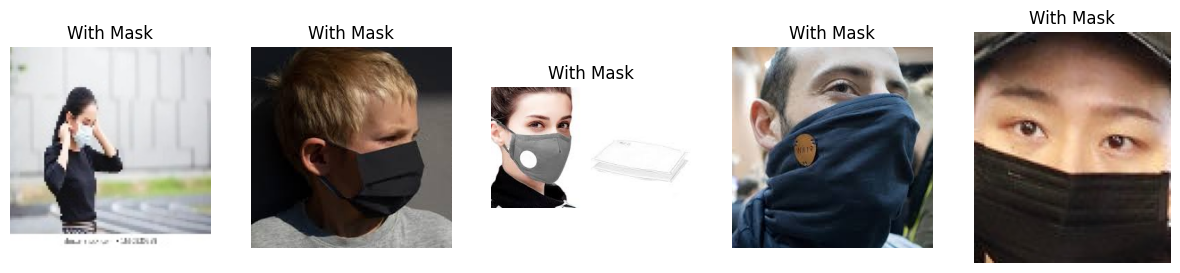

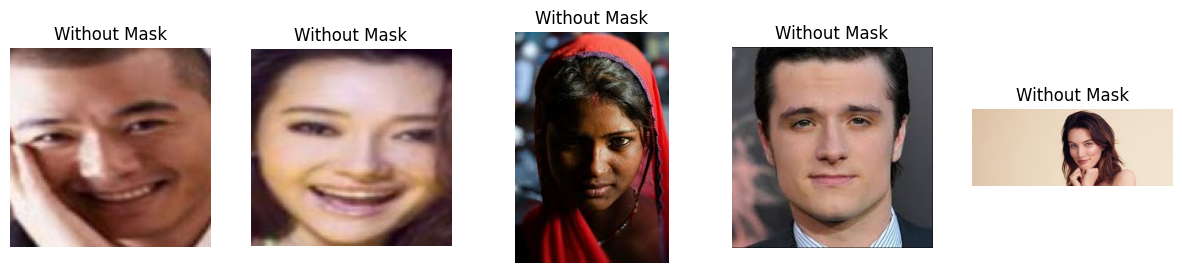

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_images(folder, title, num=5):
    files = os.listdir(folder)
    sample_files = random.sample(files, num)

    plt.figure(figsize=(15, 3))
    for i, file in enumerate(sample_files):
        img = mpimg.imread(os.path.join(folder, file))
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.show()

show_images(with_mask_path, "With Mask")
show_images(without_mask_path, "Without Mask")


In [8]:
from PIL import Image

img = Image.open(os.path.join(with_mask_path, os.listdir(with_mask_path)[0]))
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")

Image size: (267, 189)
Image mode: RGB


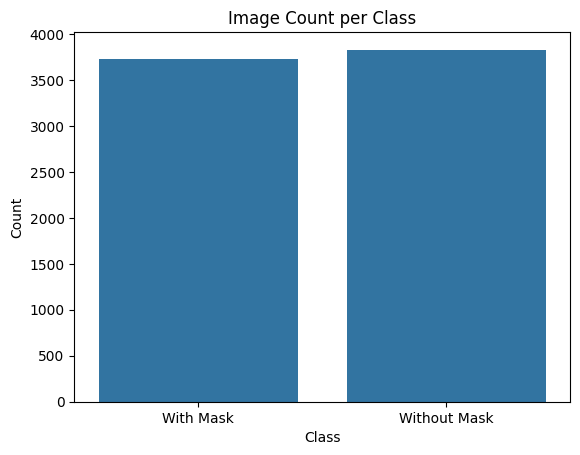

In [10]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    "Class": ["With Mask", "Without Mask"],
    "Count": [num_with_mask, num_without_mask]
})

sns.barplot(x="Class", y="Count", data=df)
plt.title("Image Count per Class")
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [12]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
105/189 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - accuracy: 0.7135 - loss: 0.5969

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7602 - loss: 0.5165

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7606 - loss: 0.5158

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 65s 309ms/step - accuracy: 0.7610 - loss: 0.5151 - val_accuracy: 0.9258 - val_loss: 0.2123
Epoch 2/20
111/189 ━━━━━━━━━━━━━━━━━━━━ 17s 219ms/step - accuracy: 0.8942 - loss: 0.2722

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


132/189 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.8934 - loss: 0.2721

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 269ms/step - accuracy: 0.8914 - loss: 0.2711 - val_accuracy: 0.9391 - val_loss: 0.1770
Epoch 3/20
 20/189 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.8895 - loss: 0.2575

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


101/189 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.9022 - loss: 0.2381

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 48s 254ms/step - accuracy: 0.9055 - loss: 0.2336 - val_accuracy: 0.9391 - val_loss: 0.1694
Epoch 4/20
 69/189 ━━━━━━━━━━━━━━━━━━━━ 25s 213ms/step - accuracy: 0.9132 - loss: 0.2305

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


126/189 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.9170 - loss: 0.2171

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 262ms/step - accuracy: 0.9194 - loss: 0.2101 - val_accuracy: 0.9377 - val_loss: 0.1775
Epoch 5/20
 43/189 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.9483 - loss: 0.1597

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 78/189 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - accuracy: 0.9448 - loss: 0.1625

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 262ms/step - accuracy: 0.9427 - loss: 0.1618 - val_accuracy: 0.9490 - val_loss: 0.1416
Epoch 6/20
 49/189 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - accuracy: 0.9445 - loss: 0.1458

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


113/189 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - accuracy: 0.9484 - loss: 0.1398

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.9497 - loss: 0.1401 - val_accuracy: 0.9298 - val_loss: 0.1827
Epoch 7/20
 12/189 ━━━━━━━━━━━━━━━━━━━━ 39s 226ms/step - accuracy: 0.9487 - loss: 0.1127

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 24/189 ━━━━━━━━━━━━━━━━━━━━ 39s 242ms/step - accuracy: 0.9567 - loss: 0.1039

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 262ms/step - accuracy: 0.9538 - loss: 0.1281 - val_accuracy: 0.9417 - val_loss: 0.1556
Epoch 8/20
 69/189 ━━━━━━━━━━━━━━━━━━━━ 25s 209ms/step - accuracy: 0.9567 - loss: 0.1241

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


148/189 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.9591 - loss: 0.1191

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 265ms/step - accuracy: 0.9588 - loss: 0.1199 - val_accuracy: 0.9477 - val_loss: 0.1467
Epoch 9/20
 78/189 ━━━━━━━━━━━━━━━━━━━━ 25s 229ms/step - accuracy: 0.9601 - loss: 0.1134

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


104/189 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - accuracy: 0.9596 - loss: 0.1148

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 81s 258ms/step - accuracy: 0.9590 - loss: 0.1170 - val_accuracy: 0.9530 - val_loss: 0.1337
Epoch 10/20
  1/189 ━━━━━━━━━━━━━━━━━━━━ 47s 250ms/step - accuracy: 0.9688 - loss: 0.0744

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 56/189 ━━━━━━━━━━━━━━━━━━━━ 28s 213ms/step - accuracy: 0.9610 - loss: 0.1082

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 258ms/step - accuracy: 0.9637 - loss: 0.1081 - val_accuracy: 0.9384 - val_loss: 0.1687
Epoch 11/20
108/189 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.9693 - loss: 0.0956

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


187/189 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.9683 - loss: 0.0967

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 47s 251ms/step - accuracy: 0.9684 - loss: 0.0966 - val_accuracy: 0.9510 - val_loss: 0.1631
Epoch 12/20
 16/189 ━━━━━━━━━━━━━━━━━━━━ 47s 277ms/step - accuracy: 0.9609 - loss: 0.0888

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 42/189 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.9669 - loss: 0.0866

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9673 - loss: 0.0940 - val_accuracy: 0.9669 - val_loss: 0.1150
Epoch 13/20
 55/189 ━━━━━━━━━━━━━━━━━━━━ 29s 219ms/step - accuracy: 0.9820 - loss: 0.0620

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


125/189 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9776 - loss: 0.0689

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 83s 263ms/step - accuracy: 0.9750 - loss: 0.0743 - val_accuracy: 0.9510 - val_loss: 0.1275
Epoch 14/20
 76/189 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.9715 - loss: 0.0724

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


154/189 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.9725 - loss: 0.0722

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 48s 253ms/step - accuracy: 0.9721 - loss: 0.0726 - val_accuracy: 0.9603 - val_loss: 0.1358
Epoch 15/20
 59/189 ━━━━━━━━━━━━━━━━━━━━ 28s 216ms/step - accuracy: 0.9714 - loss: 0.0728

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


109/189 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.9725 - loss: 0.0719

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 261ms/step - accuracy: 0.9736 - loss: 0.0689 - val_accuracy: 0.9656 - val_loss: 0.1051
Epoch 16/20
 48/189 ━━━━━━━━━━━━━━━━━━━━ 31s 223ms/step - accuracy: 0.9839 - loss: 0.0449

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


103/189 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.9815 - loss: 0.0498

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 263ms/step - accuracy: 0.9805 - loss: 0.0547 - val_accuracy: 0.9649 - val_loss: 0.1358
Epoch 17/20
 41/189 ━━━━━━━━━━━━━━━━━━━━ 30s 209ms/step - accuracy: 0.9768 - loss: 0.0799

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/189 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.9794 - loss: 0.0645

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 265ms/step - accuracy: 0.9781 - loss: 0.0659 - val_accuracy: 0.9477 - val_loss: 0.1610
Epoch 18/20
116/189 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - accuracy: 0.9725 - loss: 0.0745

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


172/189 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9737 - loss: 0.0735

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 0.9739 - loss: 0.0730 - val_accuracy: 0.9682 - val_loss: 0.1022
Epoch 19/20
 29/189 ━━━━━━━━━━━━━━━━━━━━ 38s 243ms/step - accuracy: 0.9954 - loss: 0.0214

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 79/189 ━━━━━━━━━━━━━━━━━━━━ 25s 233ms/step - accuracy: 0.9867 - loss: 0.0399

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 268ms/step - accuracy: 0.9838 - loss: 0.0489 - val_accuracy: 0.9649 - val_loss: 0.1146
Epoch 20/20
156/189 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.9839 - loss: 0.0465

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/189 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.9839 - loss: 0.0467

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 50s 267ms/step - accuracy: 0.9841 - loss: 0.0467 - val_accuracy: 0.9556 - val_loss: 0.1641


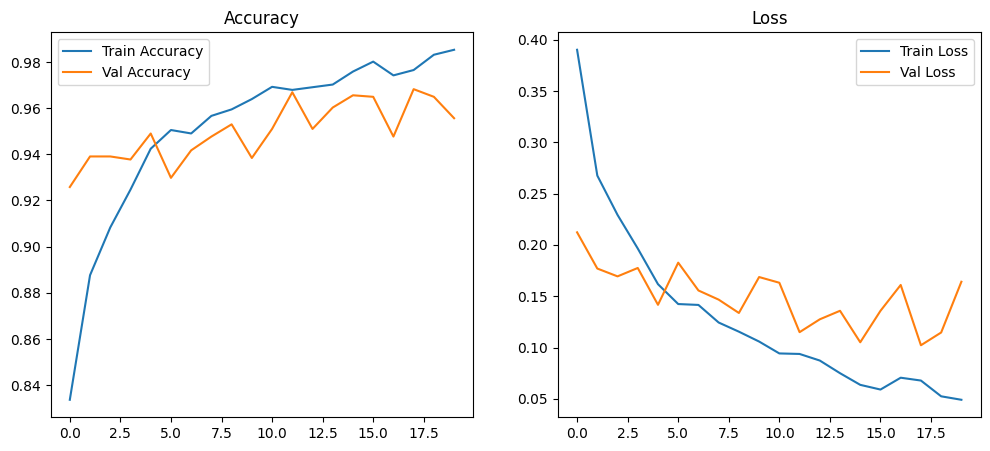

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [15]:
model.save('/content/drive/MyDrive/face_mask_dataset/mask_detector.h5')
print("model saved")

model saved


Saving Screenshot 2025-07-08 183120.png to Screenshot 2025-07-08 183120.png


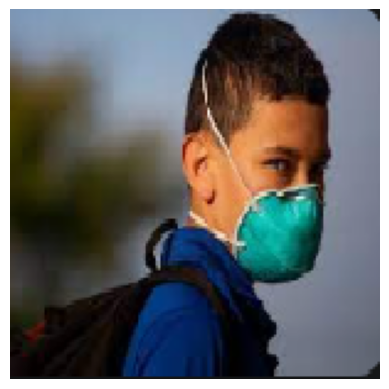

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
Prediction: With Mask (0.97)


In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

model = load_model('/content/drive/MyDrive/face_mask_dataset/mask_detector.h5')

def predict_mask(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    pred = model.predict(x)[0][0]
    if pred > 0.5:
        print(f"Prediction: Without Mask ({pred:.2f})")
    else:
        print(f"Prediction: With Mask ({1 - pred:.2f})")

uploaded = files.upload()

for fn in uploaded.keys():
    predict_mask(fn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

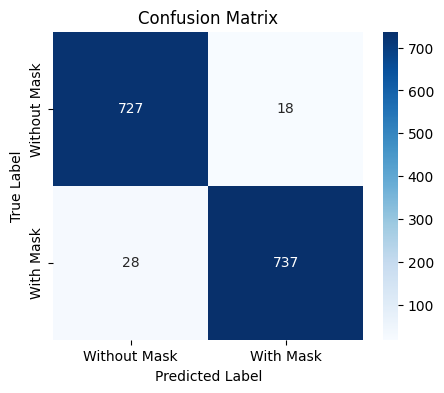

              precision    recall  f1-score   support

Without Mask       0.96      0.98      0.97       745
   With Mask       0.98      0.96      0.97       765

    accuracy                           0.97      1510
   macro avg       0.97      0.97      0.97      1510
weighted avg       0.97      0.97      0.97      1510



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

val_data.reset()

y_true = []
y_pred = []

for i in range(len(val_data)):
    X_batch, y_batch = val_data[i]
    y_true.extend(y_batch)
    preds = model.predict(X_batch)
    y_pred.extend((preds > 0.5).astype("int32").flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Without Mask', 'With Mask'],
            yticklabels=['Without Mask', 'With Mask'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_true, y_pred, target_names=['Without Mask', 'With Mask'])
print(report)